<a href="https://colab.research.google.com/github/haresh93/ERA-submissions/blob/main/S8/LN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch
!pip3 install torchvision
!pip3 install matplotlib
!pip3 install torchsummary
!pip3 install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [3]:
cuda = torch.cuda.is_available()
print("Cuda Available: ", cuda)

device = torch.device("cuda" if cuda else "cpu")

Cuda Available:  True


In [4]:
# Train and Test Transforms
train_transforms = transforms.Compose([
        transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize( (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

test_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize( (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

In [5]:
# Train and Test Datasets
train_dataset = datasets.CIFAR10('../data', train=True, download=True,
                    transform=train_transforms)
test_dataset = datasets.CIFAR10('../data', train=False, download=True,
                    transform=test_transforms)

100%|██████████| 170498071/170498071 [00:03<00:00, 49153022.73it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [6]:
dataloader_args = dict(shuffle = True, batch_size = 128, num_workers = 4, pin_memory = True)

train_dataloader = torch.utils.data.DataLoader(train_dataset, **dataloader_args)

test_dataloader = torch.utils.data.DataLoader(test_dataset, **dataloader_args)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [7]:
from model import model_summary, NetLN

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = NetLN().to(device)

model_summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             224
         GroupNorm-2            [-1, 8, 32, 32]              16
              ReLU-3            [-1, 8, 32, 32]               0
           Dropout-4            [-1, 8, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           1,168
         GroupNorm-6           [-1, 16, 32, 32]              32
              ReLU-7           [-1, 16, 32, 32]               0
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9            [-1, 8, 34, 34]             136
        GroupNorm-10            [-1, 8, 34, 34]              16
             ReLU-11            [-1, 8, 34, 34]               0
          Dropout-12            [-1, 8, 34, 34]               0
        MaxPool2d-13            [-1, 8, 17, 17]               0
           Conv2d-14           [-1, 16,

In [8]:
from model import NetLN, model_train, model_test, draw_graphs, plot_misclassified_images
from torch.optim.lr_scheduler import StepLR

model =  NetLN().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    model_train(model, device, train_dataloader, optimizer, epoch)
    model_test(model, device, test_dataloader)

EPOCH: 0


Train: Loss=1.6737 Batch_id=390 Accuracy=24.81: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]



Test set: Average loss: 1.7133, Accuracy: 3651/10000 (36.51%)

EPOCH: 1


Train: Loss=1.7877 Batch_id=390 Accuracy=36.66: 100%|██████████| 391/391 [00:31<00:00, 12.25it/s]



Test set: Average loss: 1.5156, Accuracy: 4492/10000 (44.92%)

EPOCH: 2


Train: Loss=1.4895 Batch_id=390 Accuracy=42.01: 100%|██████████| 391/391 [00:33<00:00, 11.59it/s]



Test set: Average loss: 1.3591, Accuracy: 5097/10000 (50.97%)

EPOCH: 3


Train: Loss=1.3051 Batch_id=390 Accuracy=46.82: 100%|██████████| 391/391 [00:33<00:00, 11.77it/s]



Test set: Average loss: 1.2708, Accuracy: 5404/10000 (54.04%)

EPOCH: 4


Train: Loss=1.2471 Batch_id=390 Accuracy=50.36: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]



Test set: Average loss: 1.1696, Accuracy: 5823/10000 (58.23%)

EPOCH: 5


Train: Loss=1.1679 Batch_id=390 Accuracy=53.13: 100%|██████████| 391/391 [00:32<00:00, 12.12it/s]



Test set: Average loss: 1.1964, Accuracy: 5678/10000 (56.78%)

EPOCH: 6


Train: Loss=1.3959 Batch_id=390 Accuracy=55.35: 100%|██████████| 391/391 [00:33<00:00, 11.74it/s]



Test set: Average loss: 1.1584, Accuracy: 5817/10000 (58.17%)

EPOCH: 7


Train: Loss=1.2389 Batch_id=390 Accuracy=56.87: 100%|██████████| 391/391 [00:32<00:00, 12.07it/s]



Test set: Average loss: 1.0144, Accuracy: 6421/10000 (64.21%)

EPOCH: 8


Train: Loss=1.1298 Batch_id=390 Accuracy=58.47: 100%|██████████| 391/391 [00:34<00:00, 11.36it/s]



Test set: Average loss: 0.9767, Accuracy: 6532/10000 (65.32%)

EPOCH: 9


Train: Loss=0.9891 Batch_id=390 Accuracy=60.00: 100%|██████████| 391/391 [00:32<00:00, 11.87it/s]



Test set: Average loss: 0.9925, Accuracy: 6422/10000 (64.22%)

EPOCH: 10


Train: Loss=1.0291 Batch_id=390 Accuracy=61.07: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Test set: Average loss: 0.9399, Accuracy: 6708/10000 (67.08%)

EPOCH: 11


Train: Loss=1.0723 Batch_id=390 Accuracy=62.01: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Test set: Average loss: 0.8874, Accuracy: 6896/10000 (68.96%)

EPOCH: 12


Train: Loss=1.0997 Batch_id=390 Accuracy=63.15: 100%|██████████| 391/391 [00:34<00:00, 11.38it/s]



Test set: Average loss: 0.8759, Accuracy: 6918/10000 (69.18%)

EPOCH: 13


Train: Loss=1.2685 Batch_id=390 Accuracy=63.64: 100%|██████████| 391/391 [00:32<00:00, 12.00it/s]



Test set: Average loss: 0.8721, Accuracy: 6935/10000 (69.35%)

EPOCH: 14


Train: Loss=1.0090 Batch_id=390 Accuracy=64.82: 100%|██████████| 391/391 [00:32<00:00, 11.89it/s]



Test set: Average loss: 0.8570, Accuracy: 6964/10000 (69.64%)

EPOCH: 15


Train: Loss=0.8888 Batch_id=390 Accuracy=65.30: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]



Test set: Average loss: 0.9488, Accuracy: 6705/10000 (67.05%)

EPOCH: 16


Train: Loss=1.1742 Batch_id=390 Accuracy=65.75: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]



Test set: Average loss: 0.8280, Accuracy: 7129/10000 (71.29%)

EPOCH: 17


Train: Loss=0.9284 Batch_id=390 Accuracy=66.65: 100%|██████████| 391/391 [00:32<00:00, 11.90it/s]



Test set: Average loss: 0.7900, Accuracy: 7264/10000 (72.64%)

EPOCH: 18


Train: Loss=1.0766 Batch_id=390 Accuracy=67.38: 100%|██████████| 391/391 [00:32<00:00, 12.14it/s]



Test set: Average loss: 0.7871, Accuracy: 7275/10000 (72.75%)

EPOCH: 19


Train: Loss=0.8619 Batch_id=390 Accuracy=67.72: 100%|██████████| 391/391 [00:32<00:00, 11.86it/s]



Test set: Average loss: 0.8040, Accuracy: 7150/10000 (71.50%)



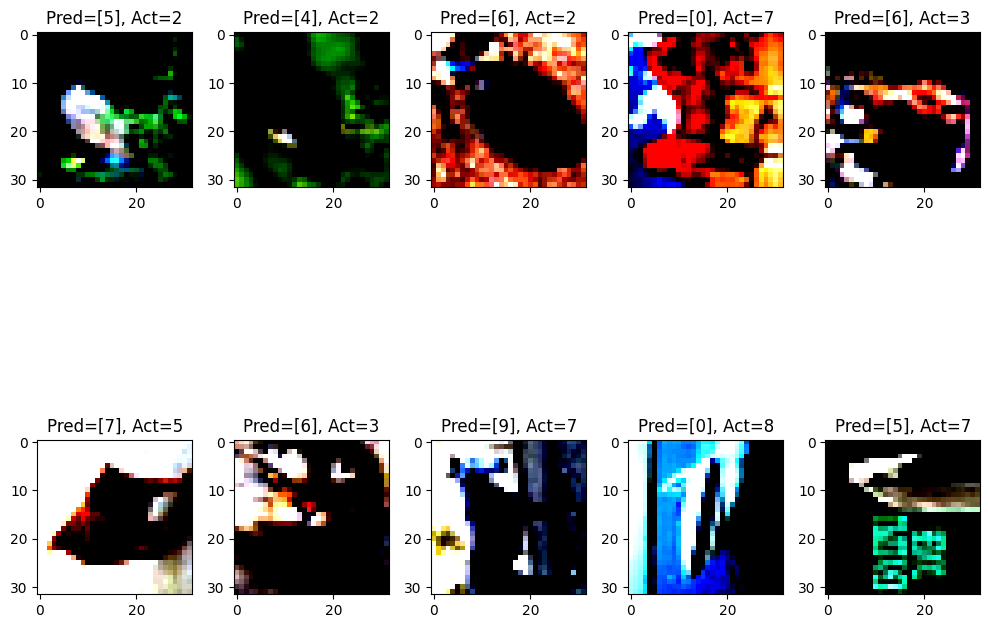

In [9]:
plot_misclassified_images()

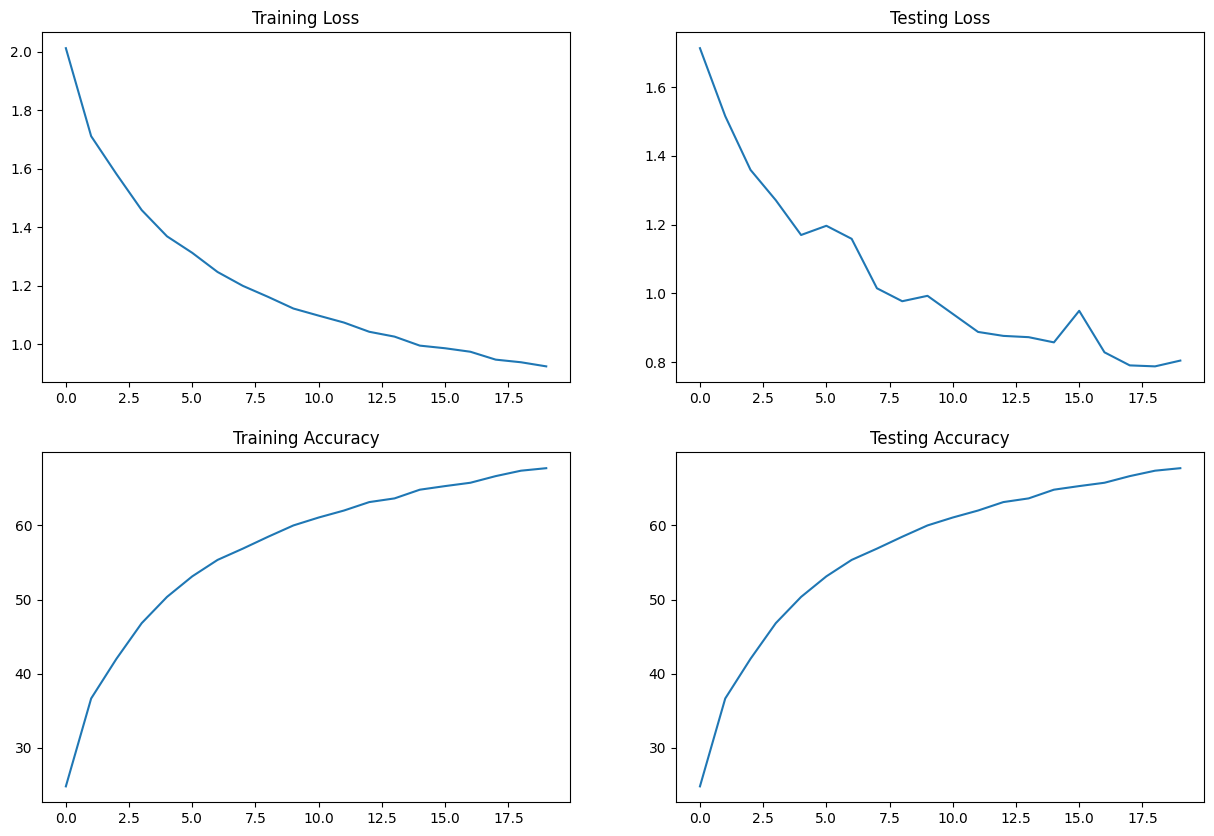

In [10]:
draw_graphs()